In [2]:
import pandas as pd

fy17 = 'Data/Monthly_visitation_09-01-16_to_08-31-17_(FY_17)_all_parks_reformat.xlsx'
fy18 = 'Data/Monthly_visitation_09-01-17_to_08-31-18_(FY_18)_all_parks_reformat.xlsx'
fy19 = 'Data/Monthly_visitation_09-01-18_to_08-31-19_(FY_19)_all_parks_format.xlsx'
fy20 = 'Data/Monthly_visitation_09-01-19_to_08-31-20_(FY_20)_all_parks_format.xlsx'
fy21 = 'Data/Monthly_visitation_09-01-20_to_01-31-21_(FY_21)_all_parks_reformat.xlsx'



In [21]:
def read_and_merge(file_name):
    df = pd.concat(pd.read_excel(file_name, sheet_name=None))

    df.reset_index(inplace=True)
    df.drop(['level_1'], axis=1, inplace=True)
    df.rename(columns={"level_0": "Visit Date Hold"}, inplace=True)
    
    df['Visit Date'] = pd.to_datetime(df['Visit Date Hold'])
    df.drop(['Visit Date Hold'], axis=1, inplace=True)

    return df

In [22]:
df_fy17 = read_and_merge(fy17)
df_fy18 = read_and_merge(fy18)
df_fy19 = read_and_merge(fy19)
df_fy20 = read_and_merge(fy20)
df_fy21 = read_and_merge(fy21)

combined_fy = pd.concat([df_fy17,df_fy18,df_fy19,df_fy20,df_fy21], axis=0, ignore_index=True)


<AxesSubplot:>

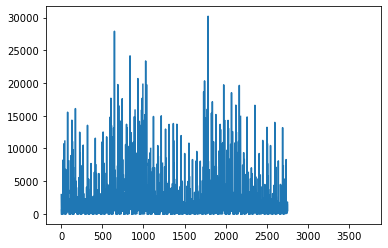

In [23]:
# graph of total visits by year

combined_fy['Full Entry Day'].plot.line()

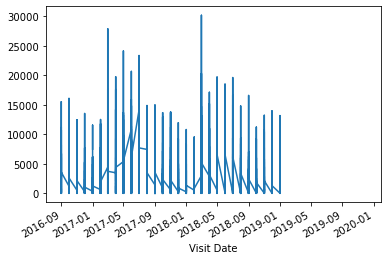

In [24]:
# graph of total visits by month
combined_fy.set_index('Visit Date')['Full Entry Day'].plot();

# todo: combine adult and child enties to get full entry day to graph 20 & 21

In [9]:
# graph of total visits by year per region